Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 5**: Consider measuring the viscosity of a liquid by timing how long it takes a solid sphere to fall a specific distance in the liquid. Calculate the viscosity according to $$\mu=2\,(\rho_{S}-\rho_{L})\,\frac{g\,r^{2}\,t}{9\,l},$$ where $\rho_{S}$ and $\rho_{L}$ are the densities of the sphere and liquid respectively, $g=9.81$ms$^{-2}$ is the gravitational acceleration, $r$ the radius of the sphere, $l$ the length of the fall and $t$ the time it takes to fall the length $l$.

**Calculation data and errors**: The density numbers will have errors to consider. For the sphere, the mass is given as $m_{S}=0.021$ kg with uncertainty of $5\times10^{-4}$ kg and the radius is $0.01$ m with uncertainty of $5\times10^{-4}$ m.

For the liquid, the volume is given as $0.1$ m$^{3}$ with uncertainty of $5\times10^{-4}$ m$^{3}$ and mass of $0.14$ kg and uncertainty of $5\times10^{-4}$ kg.

The fall distance is marked as $0.1$ m and uncertainty $5\times10^{-4}$ m while the time measurement is taken as $3.2$ s with uncertainty $0.05$ s.

All uncertainties are assumed to be Gaussian distributed and hence given as single standard deviation precision. All given measurement values are considered to be independent from each other.

**Task**: Before purchasing equipment for this experiment and spending time and effort, you wish to check how precisely the viscosity can be determined in this case. Write a function `viscosity(err1, err2)` which calculates the array of viscosities according to the random error arrays `err1` and `err2` as input. 

**(a)** Write a Monte-Carlo simulation to find the distribution of viscosity measurements you could be taking if this experiment were to be performed. Simulate 1000 experiments, plot the viscosity distribution as a histogram with appropriate axes labels and print the mean and standard deviation.



Mean: 35.017241788091106
Standard Deviation: 1.2472508509637223


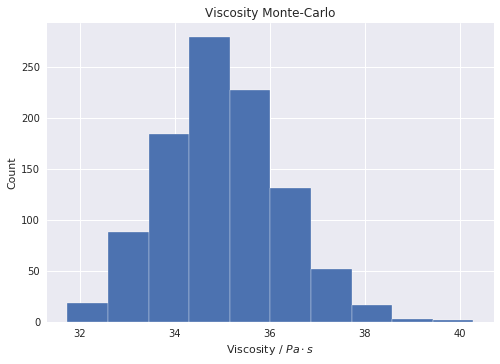

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import g
from scipy.signal import gaussian

data = {
    "sphere_mass": 2.1e-2,
    "sphere_radius": 1e-2,
    "liquid_volume": 1e-1,
    "liquid_mass": 1.4e-1,
    "fall_distance": 1e-1,
    "fall_time": 3.2,
}
nsims = 1000
err1_sd = 5e-4
err2_sd = 5e-2


def alter_values(err1, err2, special=None):
    """Adjust raw data by error arrays provided.
    Parameters:
    -----------
    err1: numpy.ndarray or float or int - values
    supplied to alter each of the following
    measurements by:
        sphere_mass
        sphere_radius
        liquid_volume
        liquid_mass
        fall_distance

    err2: numpy.ndarray or float or int - values
    supplied to alter each of the following
    measurements by:
        fall_time
    """
    altered_data = dict(())
    # np.array(([data.values()] * len(err1)))
    err1_fields = (
        "sphere_mass",
        "sphere_radius",
        "liquid_volume",
        "liquid_mass",
        "fall_distance",
    )
    err2_fields = ("fall_time",)
    if isinstance(err1, (int, float)):
        err1 = np.array((err1,))
    if isinstance(err2, (int, float)):
        err2 = np.array((err2,))
    for item in err1_fields:
        altered_data[item] = np.array([data[item]] * len(err1)) + err1
    for item in err2_fields:
        altered_data[item] = np.array([data[item]] * len(err2)) + err2
    return altered_data
    
def viscosity(err1, err2):
    """munge some data.
    """
    rdata = alter_values(err1, err2)
    sphere_density = rdata["sphere_mass"] / (
        4 / 3 * np.pi * rdata["sphere_radius"] ** 3
    )
    liquid_density = rdata["liquid_mass"] / rdata["liquid_volume"]
    liquid_viscosity = (
        2
        * (sphere_density - liquid_density)
        * (g * rdata["sphere_radius"] ** 2 * rdata["fall_time"])
        / (9 * rdata["fall_distance"])
    )
    return liquid_viscosity


err1 = np.random.normal(0, err1_sd, nsims)
err2 = np.random.normal(0, err2_sd, nsims)

plt.style.use("seaborn")
viscosity_array = viscosity(err1, err2)
print(f"Mean: {viscosity_array.mean()}\nStandard Deviation: {viscosity_array.std()}")
fig, ax = plt.subplots()
hist = ax.hist(viscosity_array, ec="w")
ax.set_xlabel("Viscosity / $Pa\cdot s$")
ax.set_ylabel("Count")
ax.set_title("Viscosity Monte-Carlo")
plt.show()

**(b)** Determine by computer experiment (iterate: change parameter, run) how to improve the viscosity precision most effectively. Consider changing individual observable uncertainty scales, one by one by the same fraction, re-run the simulation and observe the effect such a change has on the viscosity distribution width. 

Which observable uncertainty reduced to a smaller value would have the biggest beneficial effect on viscosity measurements? Name the observable in the text box below. Hint: you should notice one stand-out candidate observable.

**Sphere radius.**

In [2]:
# Test cell
mu0 = viscosity(0.0, 0.0)
assert mu0 > 34.9 and mu0 < 35.0

In [3]:
# Test cell
err1 = np.random.normal(0.0, 0.0005, 1000)
err2 = np.random.normal(0.0, 0.05, 1000)
mu = viscosity(err1, err2)
assert np.mean(mu) > 34.8 and np.mean(mu) < 35.2
assert np.std(mu) > 1.1 and np.std(mu) < 1.3

### Tests - 4 marks; Style - 1 mark; Plot - 2 marks